# McDonald's Nutrition: What you should have if you are on a specific diet

McDonald's is one of the worlds largest fast food resturants and according to Lock(2020) as of 2019, there were a total of 38,695 franchised restaurants globally. McDonald's food is globally regarded as rather unhealthy for you, but in this notebook, I want to show that even though you maybe on a diet, you can still enjoy McDonald's to its fullest. In this notebook I will be using a kaggle dataset called Nutrition Facts for McDonald's Menu by McDonalds, to try to change societal perceptions of fast food. 

This notebook will cover the following:

    * What is the unhealthiest food option on McDonald's menu?
    
    * What is the healthiest food option on the McDonald's menu?
    
    * What is the healthiest drinks option on the McDonald's menu?
    
    * What can you eat if you are on a low carb diet?
    
    * What can you eat if you are on a low fat diet?
    
    * What can you eat if you are on a low sodium diet?
    
    * What can you eat if you are on a high protein diet?
    
    * What can you eat if you are on a heart related diet?
    

# Data preparation

Before we start analysing the data and making assumptions, we need to load the data into the notebook.

In [1]:
# Allows for the use of linear algebra
import numpy as np

# Allows for the use of data processing 
import pandas as pd

# Allows for the use of graphs
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Reads the csv file and stores it as a dataFrame within a variable
menu_dataset = pd.read_csv('menu.csv')

# Displays the first 5 dataFrame rows
menu_dataset.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
# Shows if any of the columns have missing values
menu_dataset.isnull()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


From the output windows above, we can see that there are a total of 24 columns with no missing values.

In order to make data analysis slightly easier, I have separated each catagory into more sizable datasets

In [10]:
breakfast_menu = pd.read_csv('breakfast.csv')

protein_menu = pd.read_csv('mains_menu.csv')

beverage_menu = pd.read_csv('drinks_menu.csv')

extras_menu = pd.read_csv('extras_menu.csv')

breakfast_menu.head()

,catagory,item,serving_Size,calories,calories_Fat,total_Fat,total_Daily_Fat,saturated_Fat,saturated_Daily_Fat,trans_Fat,...,carbohydrates,carbohydrates_Daily,dietary_Fibre,dietary_Fibre_Daily,sugars,protein,vitamin_A,vitamin_C,calcium_Daily,iron_Daily
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35,8,42,0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28,43,10,52,0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23,35,8,42,0,...,30,10,4,17,2,21,6,0,25,10


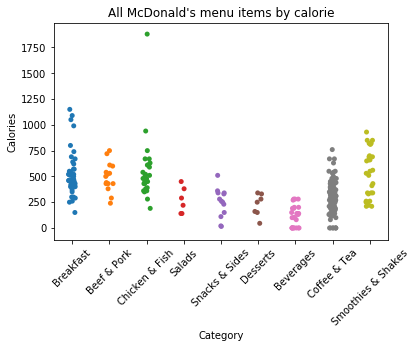

In [5]:
# Creates a strip plot graph that shows the highest number of calories in the catgory column
catagory_plot = sns.stripplot(x='Category', y='Calories', data=menu_dataset, size=5)
# assigns labels to the x axis and sets them to a 45 degree angle
catagory_plot.set_xticklabels(catagory_plot.get_xticklabels(), rotation= 45)
plt.title('All McDonald\'s menu items by calorie')
plt.show()

In [6]:
# Identifies the top 5 highest calorie menu items
menu_dataset.nlargest(5, 'Calories')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,118,39,6,24,1,87,0,15,8,25
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,...,116,39,7,28,17,36,15,2,30,40
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56.0,87,19.0,96,0.0,...,111,37,6,23,17,36,15,2,25,40
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050,450,50.0,77,16.0,81,0.0,...,115,38,7,28,18,35,4,2,25,30
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,14.9 oz (423 g),990,410,46.0,70,16.0,78,0.0,...,110,37,6,23,17,35,0,2,25,30


From the data above, we can see that the top five unhealthiest menu items are:
    
    1. 40 piece Chicken Nuggets
    
    2. Big Breakfast with Hotcakes (Large Biscuit)
    
    3. Big Breakfast with Hotcakes (Regular Biscuit)
    
    4. Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)
    
    5. Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)
    
This is quite a suprising result because I was not expecting so many breakfast menu items to be so high in calories compared to the lunch menu.

In [7]:
# Identifies the top 5 highest calorie menu items
menu_dataset.nsmallest(5, 'Calories')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
116,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
117,Beverages,Diet Coke (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
122,Beverages,Diet Dr Pepper (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,2,0,0,0,0


Now, I was expecting the lowest calorie menu items to be drinks because most diet drinks are zero calorie.

## Unhealthiest menu items by catagory

Within this section I will be identifying the most unhealthy breakfast item, main menu item, drinks menu item and side menu items.

### Unhealthy Breakfast Menu

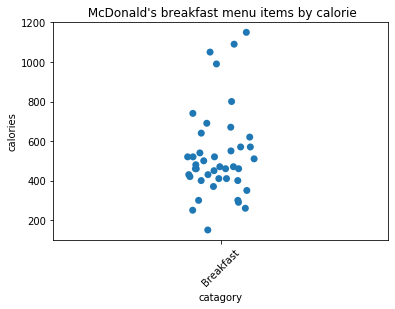

In [23]:
# Creates a strip plot graph that shows the highest number of calories in the catgory column
breakfast_plot = sns.stripplot(x='catagory', y='calories', data=breakfast_menu, size=7)
# assigns labels to the x axis and sets them to a 45 degree angle
breakfast_plot.set_xticklabels(breakfast_plot.get_xticklabels(), rotation= 45)
plt.title(' McDonald\'s breakfast menu items by calorie')
plt.show()

In [25]:
# Identifies the top 5 highest calorie menu items
breakfast_menu.nlargest(5, 'calories')

,catagory,item,serving_Size,calories,calories_Fat,total_Fat,total_Daily_Fat,saturated_Fat,saturated_Daily_Fat,trans_Fat,...,carbohydrates,carbohydrates_Daily,dietary_Fibre,dietary_Fibre_Daily,sugars,protein,vitamin_A,vitamin_C,calcium_Daily,iron_Daily
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60,93,20,100,0,...,116,39,7,28,17,36,15,2,30,40
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56,87,19,96,0,...,111,37,6,23,17,36,15,2,25,40
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (L,15.4 oz (437 g),1050,450,50,77,16,81,0,...,115,38,7,28,18,35,4,2,25,30
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (R,14.9 oz (423 g),990,410,46,70,16,78,0,...,110,37,6,23,17,35,0,2,25,30
28,Breakfast,Big Breakfast (Large Biscuit),10 oz (283 g),800,470,52,80,18,90,0,...,56,19,4,17,3,28,15,2,15,30
